In [150]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [151]:
# read in the file that I created in Microsoft Excel containing the dataset of concussions 
# and lower body injuries from the last 10 seasons in the NBA
concussions = pd.read_excel('Pre and Post Concussion Injury Data.xlsx')
# only get the concussion data from the 2018-19 season, which is what I have chosen to examine
concussions = concussions[82:99]

In [152]:
# read in the file that I created in Microsoft Excel containing the dataset of player
# statistics for players who suffered a concussion during the 2018-19 season

# create a dictionary
stats = {}
# list out the players that we are going to be analyzing
players_original = ['Markieff Morris', 'Troy Daniels', 'Giannis Antetokounmpo',
          'Davis Bertans', 'Ersan Ilyasova', 'Nerlens Noel', 'Andre Drummond',
          'Tyler Lydon', 'Karl-Anthony Towns', 'Isaiah Briscoe', 'Ante Zizic',
          'Matthew Dellavedova', 'Gordon Hayward', 'Michael Kidd-Gilchrist',
          'Frank Jackson', 'OG Anunoby', 'Jonathan Isaac']
# read each player's stats from the excel file
for player in players_original:
    df = pd.read_excel('2018-19 NBA Shooting Data.xlsx', sheetname=player)
    stats[player] = df
    
# create dictionaries that will keep track of each player's indexes for 
# concussion dates and return dates
concussion_date_indexes = {'Markieff Morris' : 7, 'Troy Daniels': 2, 'Giannis Antetokounmpo': 7,
          'Davis Bertans': 15, 'Ersan Ilyasova': 21, 'Nerlens Noel': 41, 'Andre Drummond': 45,
          'Tyler Lydon': 56, 'Karl-Anthony Towns': 58, 'Isaiah Briscoe': 61, 'Ante Zizic': 63,
          'Matthew Dellavedova': 64, 'Gordon Hayward': 71, 'Michael Kidd-Gilchrist': 70,
          'Frank Jackson': 77, 'OG Anunoby': 76, 'Jonathan Isaac': 80}
return_date_indexes = {'Markieff Morris': 7, 'Troy Daniels': 22, 'Giannis Antetokounmpo': 7,
          'Davis Bertans': 17, 'Ersan Ilyasova': 24, 'Nerlens Noel':44, 'Andre Drummond': 48,
          'Tyler Lydon': 58, 'Karl-Anthony Towns': 60, 'Isaiah Briscoe': 63, 'Ante Zizic': 66,
          'Matthew Dellavedova': 81, 'Gordon Hayward': 74, 'Michael Kidd-Gilchrist': 75,
          'Frank Jackson': 81, 'OG Anunoby': 89, 'Jonathan Isaac': 81}

# we can see that some of the players will not be helpful for the analysis simply because of the
# timing of their injury near the end of the season, so I will remove them from the list
players = ['Davis Bertans', 'Ersan Ilyasova', 'Nerlens Noel', 'Andre Drummond',
          'Karl-Anthony Towns', 'Isaiah Briscoe', 'Ante Zizic']

In [153]:
# Calculate rolling average FT%
for key in stats:
    df = stats[key]

    for i in range(0, df.shape[0] - 9):

        # calculate number of free throws made over last ten games
        num_ft_made = 0
        for j in range(0,10):
            if not np.isnan(df.iloc[i + j, 16]):
                num_ft_made = num_ft_made + df.iloc[i + j, 16]

        # calculate number of free throws attempted over last ten games
        num_ft_attempt = 0
        for k in range(0,10):
            if not np.isnan(df.iloc[i + k, 17]):
                num_ft_attempt = num_ft_attempt + df.iloc[i + k, 17]

        # add the rolling FT% to the dataframe
        if num_ft_attempt == 0:
            df.loc[df.index[i + 9], 'Rolling FT %'] = None
        else:
            df.loc[df.index[i + 9], 'Rolling FT %'] = np.round(num_ft_made / num_ft_attempt, 3)

In [154]:
# Calculate rolling average FG%
for key in stats:
    df = stats[key]

    for i in range(0, df.shape[0] - 9):

        # calculate number of field goals made over last ten games
        num_fg_made = 0
        for j in range(0,10):
            if not np.isnan(df.iloc[i + j, 10]):
                num_fg_made = num_fg_made + df.iloc[i + j, 10]

        # calculate number of field goals attempted over last ten games
        num_fg_attempt = 0
        for k in range(0,10):
            if not np.isnan(df.iloc[i + k, 11]):
                num_fg_attempt = num_fg_attempt + df.iloc[i + k, 11]

        # add the rolling FG% to the dataframe
        if num_fg_attempt == 0:
            df.loc[df.index[i + 9], 'Rolling FG %'] = None
        else:
            df.loc[df.index[i + 9], 'Rolling FG %'] = np.round(num_fg_made / num_fg_attempt, 3)

In [166]:
# Calculate rolling average 3P%
for key in stats:
    df = stats[key]

    for i in range(0, df.shape[0] - 9):

        # calculate number of three pointers made over last ten games
        num_3p_made = 0
        for j in range(0,10):
            if not np.isnan(df.iloc[i + j, 13]):
                num_3p_made = num_3p_made + df.iloc[i + j, 13]

        # calculate number of three pointers attempted over last ten games
        num_3p_attempt = 0
        for k in range(0,10):
            if not np.isnan(df.iloc[i + k, 14]):
                num_3p_attempt = num_3p_attempt + df.iloc[i + k, 14]

        # add the rolling 3P% to the dataframe
        if num_3p_attempt == 0:
            df.loc[df.index[i + 9], 'Rolling 3P %'] = None
        else:
            df.loc[df.index[i + 9], 'Rolling 3P %'] = np.round(num_3p_made / num_3p_attempt, 3)

In [167]:
# Calculate rolling average eFG%
for key in stats:
    df = stats[key]

    for i in range(0, df.shape[0] - 9):

        # sum the eFG%'s over last ten games
        sum_eFG = 0
        for j in range(0,10):
            if not np.isnan(df.iloc[i + j, 30]):
                sum_eFG = sum_eFG + df.iloc[i + j, 30]
                
        # add the rolling eFG% to the dataframe
        if sum_eFG == 0:
            df.loc[df.index[i + 9], 'Rolling eFG %'] = None
        else:
            df.loc[df.index[i + 9], 'Rolling eFG %'] = np.round(sum_eFG / 10, 3)

In [168]:
# for each player, see their average the 10 games before the concussion and the ten games after
for player in players:
    df = stats[player]
    print(player)
    print('FT % Before: ', 100 * df["Rolling FT %"].iloc[concussion_date_indexes[player]], ' %')
    print('FT % After: ', 100 * df["Rolling FT %"].iloc[return_date_indexes[player]], ' %')
    print('FG % Before: ', 100 * df["Rolling FG %"].iloc[concussion_date_indexes[player]], ' %')
    print('FG % After: ', 100 * df["Rolling FG %"].iloc[return_date_indexes[player]], ' %')
    print('3P % Before: ', 100 * df["Rolling 3P %"].iloc[concussion_date_indexes[player]], ' %')
    print('3P % After: ', 100 * df["Rolling 3P %"].iloc[return_date_indexes[player]], ' %')
    print('eFG % Before: ', 100 * df["Rolling eFG %"].iloc[concussion_date_indexes[player]], ' %')
    print('eFG % After: ', 100 * df["Rolling eFG %"].iloc[return_date_indexes[player]], ' %')
    print("\n")

Davis Bertans
FT % Before:  83.3  %
FT % After:  88.9  %
FG % Before:  44.7  %
FG % After:  45.2  %
3P % Before:  40.0  %
3P % After:  40.6  %
eFG % Before:  45.1  %
eFG % After:  45.9  %


Ersan Ilyasova
FT % Before:  66.7  %
FT % After:  100.0  %
FG % Before:  44.7  %
FG % After:  37.1  %
3P % Before:  21.4  %
3P % After:  28.599999999999998  %
eFG % Before:  29.299999999999997  %
eFG % After:  25.4  %


Nerlens Noel
FT % Before:  72.7  %
FT % After:  80.0  %
FG % Before:  68.0  %
FG % After:  70.39999999999999  %
3P % Before:  nan  %
3P % After:  nan  %
eFG % Before:  53.800000000000004  %
eFG % After:  50.5  %


Andre Drummond
FT % Before:  52.0  %
FT % After:  72.0  %
FG % Before:  48.4  %
FG % After:  50.0  %
3P % Before:  0.0  %
3P % After:  0.0  %
eFG % Before:  35.0  %
eFG % After:  30.9  %


Karl-Anthony Towns
FT % Before:  84.8  %
FT % After:  76.8  %
FG % Before:  60.0  %
FG % After:  64.4  %
3P % Before:  46.7  %
3P % After:  54.300000000000004  %
eFG % Before:  52.6  %
eF

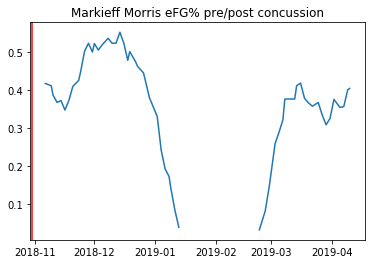

In [161]:
# Markieff Morris was not helpful to examine becuase his concussion
# occurred too early in the season to have reliable data beforehand
df = stats['Markieff Morris']
x = df['Date']
y = df['Rolling eFG %']

plt.plot(x,y)
plt.title('Markieff Morris eFG% pre/post concussion')
plt.axvline(x=concussions["Date of Concussion"].loc[concussions['Player'] == 'Markieff Morris'], color='red')

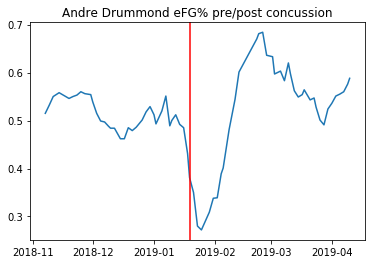

In [162]:
# We can see that the rolling mean of Drummond's eFG% drops suddenly after his concussion,
# but this is because he is sitting out games during that period. Once, he has played 10 games,
# enough to get an accuarte sample, his eFG% is back to normal 
df = stats['Andre Drummond']
x = df['Date']
y = df['Rolling eFG %']

plt.plot(x,y)
plt.title('Andre Drummond eFG% pre/post concussion')
plt.axvline(x=concussions["Date of Concussion"].loc[concussions['Player'] == 'Andre Drummond'], color='red')

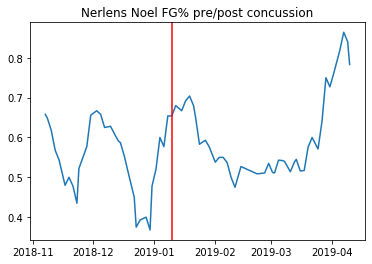

In [163]:
# We can see that the rolling mean of Noel's FG% stays on the same trend post
# concussion as it was pre-concussion
df = stats['Nerlens Noel']
x = df['Date']
y = df['Rolling FG %']

plt.plot(x,y)
plt.title('Nerlens Noel FG% pre/post concussion')
plt.axvline(x=concussions["Date of Concussion"].loc[concussions['Player'] == 'Nerlens Noel'], color='red')

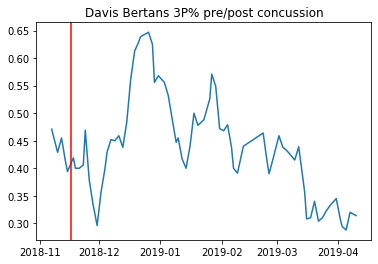

In [169]:
# We can see that the rolling mean of Bertan's 3P% stays on the same trend post
# concussion as it was pre-concussion
df = stats['Davis Bertans']
x = df['Date']
y = df['Rolling 3P %']

plt.plot(x,y)
plt.title('Davis Bertans 3P% pre/post concussion')
plt.axvline(x=concussions["Date of Concussion"].loc[concussions['Player'] == 'Davis Bertans'], color='red')